### Understanding a Convolutional Neural Network using Keras



In [1]:
# Import essential libraries
import numpy as np
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras

In [2]:
# load the MNIST image dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.\
                                                mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


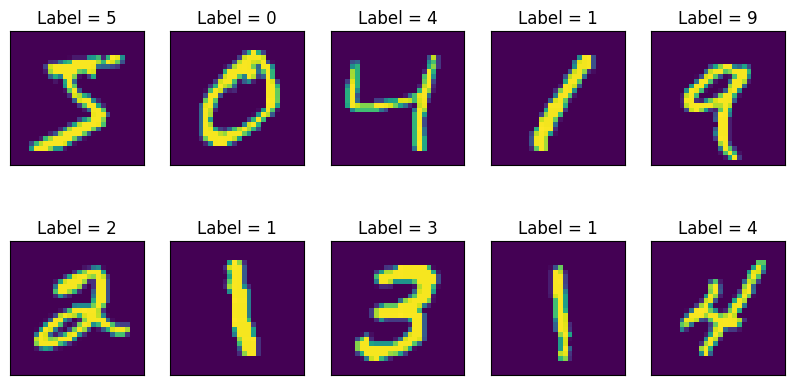

In [3]:
# Plot 10 of the training images

import matplotlib.pyplot as plt

f, ax = plt.subplots(2, 5, figsize=(10, 5))
ax = ax.flatten()

for i in range(10):
    ax[i].imshow(x_train[i,:,:])
    ax[i].set_title(f'Label = {y_train[i]}')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.show()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
train_images = x_train
train_labels = y_train
test_images = x_test
test_labels = y_test

print(train_images.shape)
print(train_labels.shape)
print(test_labels.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000,)
(10000,)


In [6]:
# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Reshape the images
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

num_filters = 8
filter_size = 3
pool_size = 2

model = Sequential([
    Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=pool_size),
    Flatten(),
    Dense(10, activation='softmax'),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [10]:
train_labels = y_train
print(train_labels[0]) # 5

5


In [12]:
from tensorflow.keras.utils import to_categorical

model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=25,
  validation_data=(test_images, to_categorical(test_labels)),
)

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9704 - loss: 0.1046 - val_accuracy: 0.9689 - val_loss: 0.0999
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9733 - loss: 0.0922 - val_accuracy: 0.9719 - val_loss: 0.0894
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9761 - loss: 0.0783 - val_accuracy: 0.9728 - val_loss: 0.0835
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9783 - loss: 0.0742 - val_accuracy: 0.9754 - val_loss: 0.0813
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9795 - loss: 0.0689 - val_accuracy: 0.9745 - val_loss: 0.0793
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9817 - loss: 0.0605 - val_accuracy: 0.9763 - val_loss: 0.0748
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9832 - loss: 0.0564 - val_accuracy: 0.9758 - val_loss: 0.0745
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9835 - loss: 0.0543

In [13]:
# Create the layers for the CNN model, using the Functional API

from tensorflow.keras import layers, models


In [14]:
# Create the model, using the input and output tensors you have define above.

Inp = layers.Input(shape=(28, 28, 1), dtype='float32')
Conv1 = layers.Conv2D(32, (3,3), strides=(1, 1), activation='relu', padding='same')(Inp)
MaxPool1 = layers.MaxPooling2D((2, 2))(Conv1)
Conv2 = layers.Conv2D(32, (3,3), strides=(1, 1), activation='relu', padding='same')(MaxPool1)
MaxPool2 = layers.MaxPooling2D((2, 2))(Conv2)
Flat = layers.Flatten()(MaxPool2)
Dense1 = layers.Dense(64, activation='relu')(Flat)
Dense2 = layers.Dense(10)(Dense1)

mnist_model = models.Model(inputs=Inp, outputs=Dense2)

# Display the model summary.
mnist_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         100,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 110,634 (432.16 KB)

 Trainable params: 110,634 (432.16 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Compile the model with the Adam optimizer, Sparse Categorical Crossentropy
from tensorflow.keras import losses, optimizers


mnist_model.compile(optimizer=optimizers.Adam(),
                    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics=['accuracy'])


In [16]:
# Train the model for 25 epochs on the training images and labels
# Using the test images and labels as validation data

batch_size = 512
epochs = 25

history = mnist_model.fit(x=train_images, y=train_labels, epochs=epochs,
                          validation_data=(test_images, test_labels),
                          batch_size=512)


# Keys inside the history dictionary.
print(history.history.keys)

Epoch 1/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.6694 - loss: 1.2065 - val_accuracy: 0.9527 - val_loss: 0.1629
Epoch 2/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9577 - loss: 0.1434 - val_accuracy: 0.9699 - val_loss: 0.0968
Epoch 3/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9729 - loss: 0.0926 - val_accuracy: 0.9800 - val_loss: 0.0635
Epoch 4/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9796 - loss: 0.0692 - val_accuracy: 0.9806 - val_loss: 0.0617
Epoch 5/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9823 - loss: 0.0594 - val_accuracy: 0.9847 - val_loss: 0.0470
Epoch 6/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9857 - loss: 0.0489 - val_accuracy: 0.9827 - val_loss: 0.0517
Epoch 7/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9852 - loss: 0.0476 - val_accuracy: 0.9864 - val_loss: 0.0381
Epoch 8/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9893 - loss: 0.0367 - val_accuracy

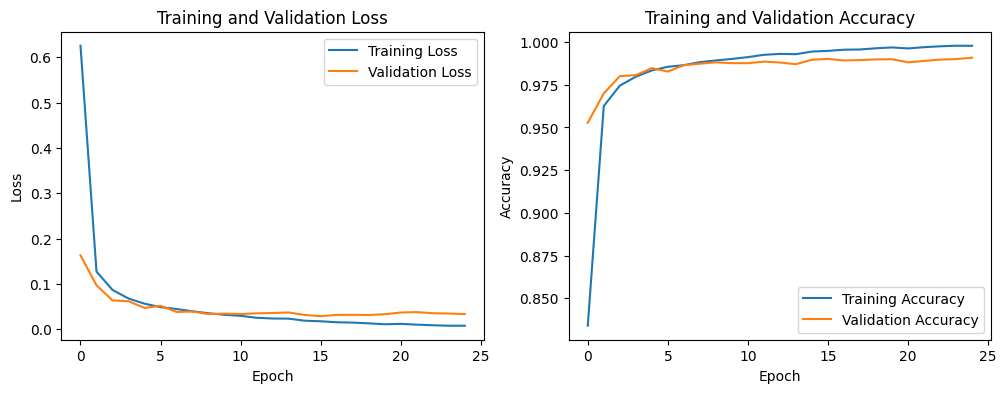

In [17]:
# Plot the losses and metrics for the training and validation data.

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()


In [18]:
# Add a softmax activation layer by creating a new seuqential model that takes
# the original model as the first layer in the list

import numpy as np

prediction_model = models.Sequential([mnist_model, layers.Softmax()])
prediction_model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ functional_2 (Functional)            │ (None, 10)                  │         110,634 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax (Softmax)                    │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 110,634 (432.16 KB)

 Trainable params: 110,634 (432.16 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Predict method to find the probabilities of each test image


probabilities = prediction_model.predict(test_images)
predicted_classes = np.argmax(probabilities, axis=1)
print(predicted_classes)
print(test_labels)
accuracy = accuracy_score(test_labels, predicted_classes)
print(f"Accuracy: {accuracy:.2f}")



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]
Accuracy: 0.99


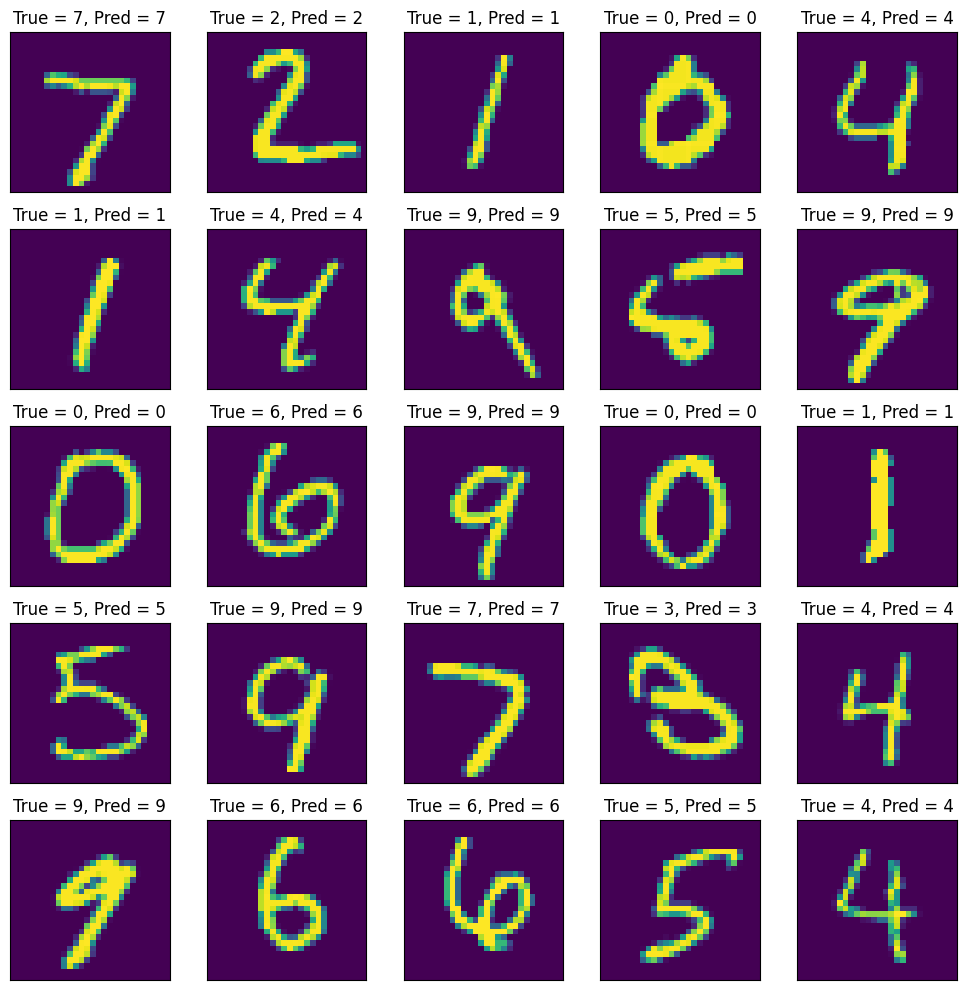

In [20]:
# Create a plot which displays images

f, ax = plt.subplots(5, 5, figsize=(10, 10))
ax = ax.flatten()

for i in range(25):
    ax[i].imshow(test_images[i, :, :])
    ax[i].set_title(f'True = {test_labels[i]}, Pred = {predicted_classes[i]}', pad=6)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.tight_layout()
plt.show()



In [23]:
# Accuracy and Loss for the test dataset

score = mnist_model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.03346508368849754
Test accuracy: 0.9908000230789185
